## **GithubLink**=https://github.com/AbhijeetS1112/Mobile_price_range_prediction.git

## **Problem Description**
###  In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.
###The objective is to find out some relation between features of a mobile phone  (eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# **Data Description** -

---



### **Battery_power** - Total energy a battery can store in one time measured in mAh
### **Blue** - Has bluetooth or not
### **Clock_speed** - speed at which microprocessor executes instructions
### **Dual_sim** - Has dual sim support or not
### **Fc** - Front Camera mega pixels
### **Four_g** - Has 4G or not
### **Int_memory** - Internal Memory in Gigabytes
### **M_dep** - Mobile Depth in cm
### **Mobile_wt** - Weight of mobile phone
### **N_cores** - Number of cores of processor
### **Pc** - Primary Camera mega pixels
### **Px_height** - Pixel Resolution Height
### **Px_width** - Pixel Resolution Width
### **Ram** - Random Access Memory in Mega Bytes
### **Sc_h** - Screen Height of mobile in cm
### **Sc_w** - Screen Width of mobile in cm
### **Talk_time** - longest time that a single battery charge will last
### **Three_g** - Has 3G or not
### **Touch_screen** - Has touch screen or not
### **Wifi** - Has wifi or not
### **Price_range** - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

## **Importing Basic Libraries**


In [ ]:
import numpy as np # for mathematical calculation
import pandas as pd # for manipulation
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization
%matplotlib inline 
sns.set() 
import warnings # For remove warnings
warnings.filterwarnings("ignore")

## **Mounting drive**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/data_mobile_price_range.csv")

In [ ]:
# For displaying all the columns
pd.set_option("display.max_columns",None)

In [ ]:
# checking Top 5 values
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
#checking bottom 5 values
df.tail(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


## **Exploring data Analysis**

In [ ]:
#checking shape of columns
print("Number of columns",df.shape[1])
print("Number of Rows",df.shape[0])

Number of columns 21
Number of Rows 2000


In [ ]:
# Checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**So u can see above the dataset does not have any null values**

In [ ]:
# Checking Statistical Information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


**So the px_height and sc_w  minimum values have equal to 0 . it seems wierd**

In [ ]:
# target values
df["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

**So there is no imbalance class in dataset**

## **Univariate analysis**

In [ ]:
#creating list of numerical and categorical columns
numerical_columns=[]
for col in df.columns:
  if df[col].nunique()>5:
    numerical_columns.append(col)
encoded_cat_columns=list(set(df.columns)-set(numerical_columns))

In [ ]:
#printing the list of numerical columns in the dataframe
print(numerical_columns)

['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


In [ ]:
#printing the list of encoded categorical columns in the dataframe
print(encoded_cat_columns)

['price_range', 'blue', 'touch_screen', 'dual_sim', 'four_g', 'wifi', 'three_g']


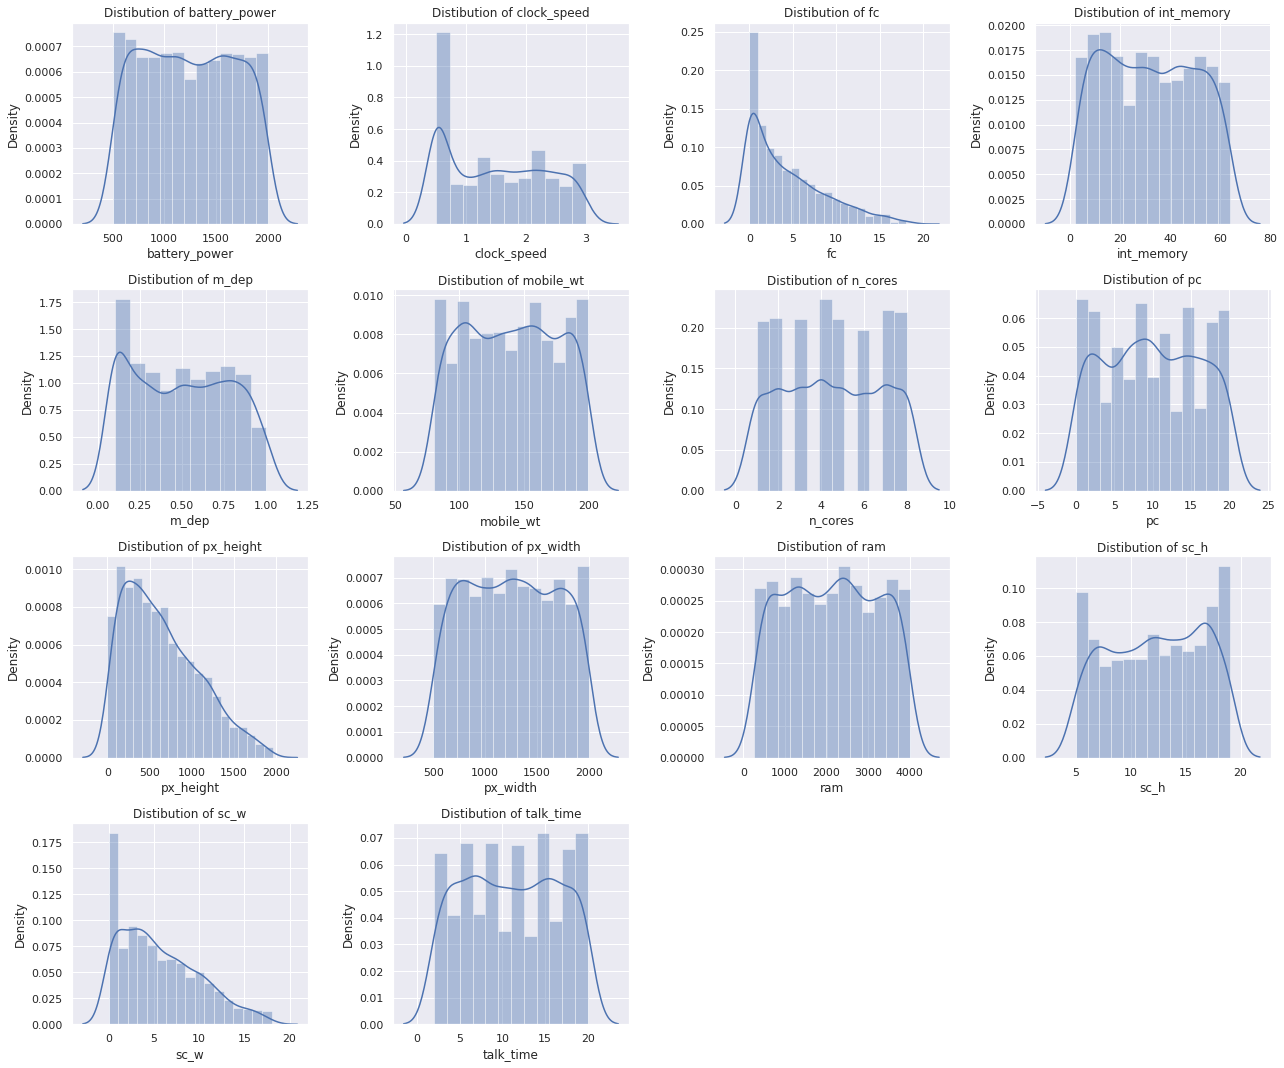

In [ ]:
#Displaying the distribution plots of numerical columns
fig = plt.figure(figsize=(18,15))
c=1
for i in numerical_columns:
  plt.subplot(4,4, c)
  sns.distplot(df[i],kde=True)
  plt.title('Distibution of {}'.format(i))
  c+=1
plt.tight_layout() 

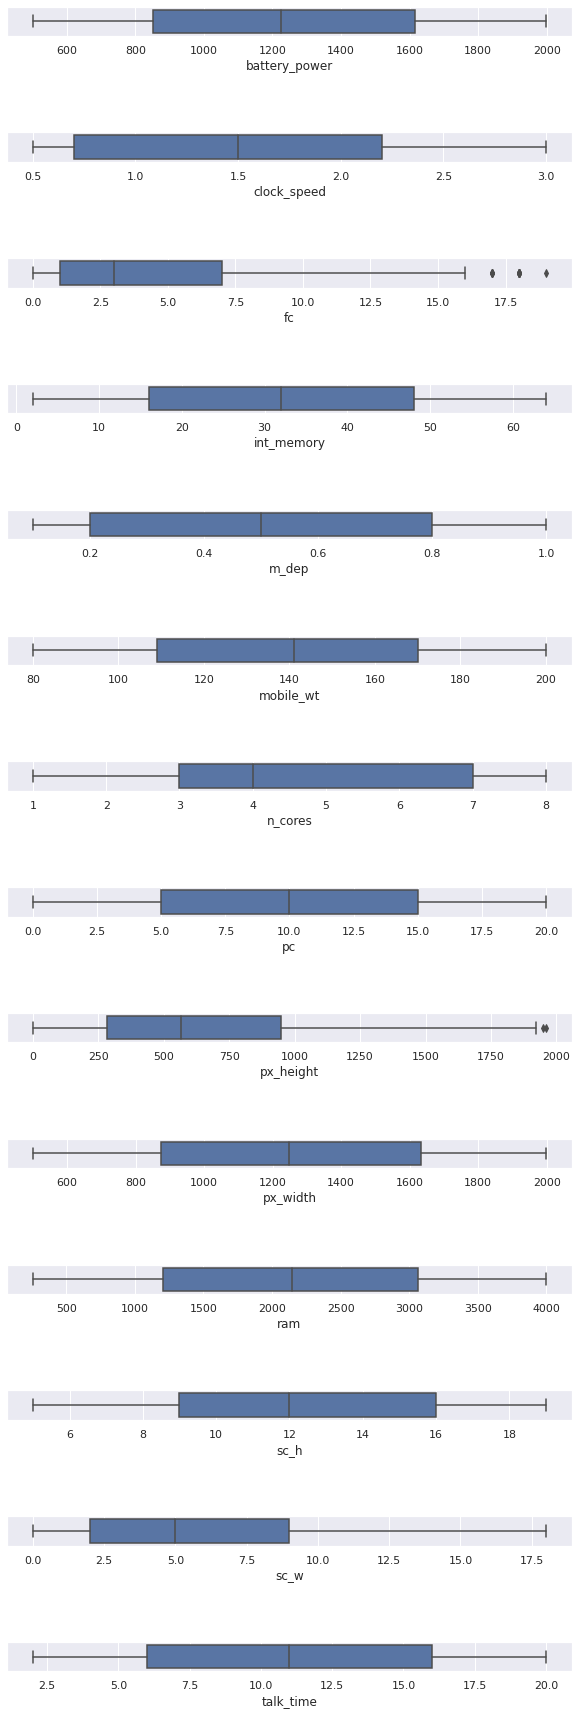

In [ ]:
#Checking for outliers

fig = plt.figure(figsize=(8,25))
c=1
for i in numerical_columns :
    plt.subplot(15,1, c)
    plt.xlabel('Distibution of {}'.format(i))
    sns.boxplot(x=i,data=df)
    c = c + 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

**Data Does Not contain extreme Outlier**

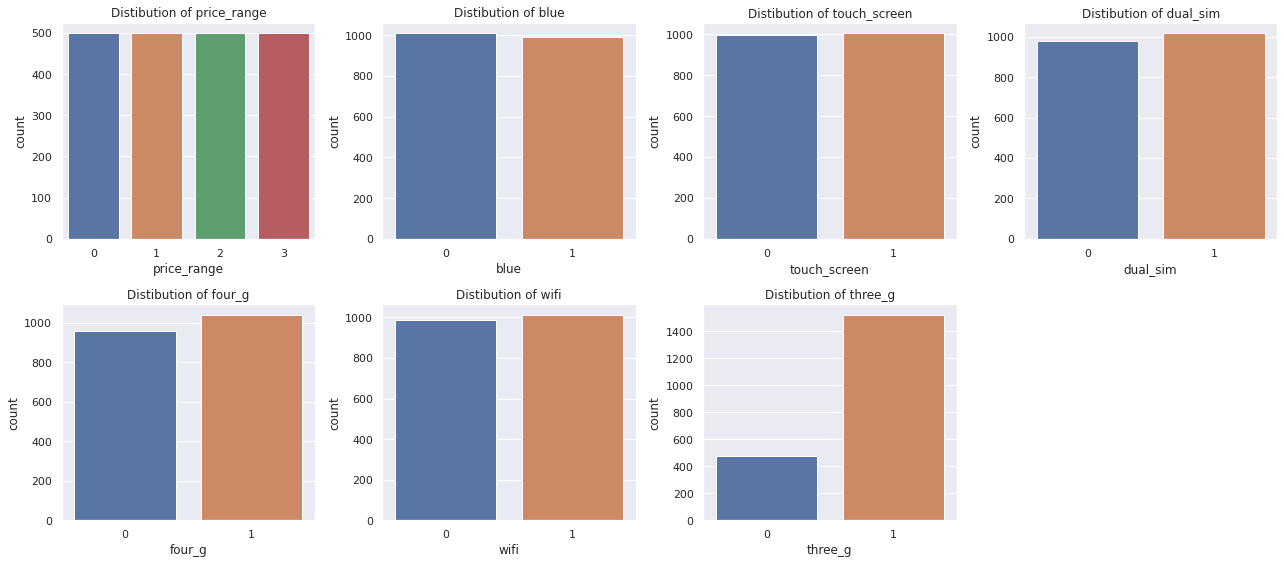

In [ ]:
#Count plot of categorical columns

fig = plt.figure(figsize=(18,8))
c=1
for i in encoded_cat_columns:
  plt.subplot(2,4, c)
  sns.countplot(df[i])
  plt.title('Distibution of {}'.format(i))
  c+=1
plt.tight_layout()  

### Conclusions from univariate analysis

- Most of the phones currently available in the market  have 3G support
- There is a similar count of records for phones belonging to all price ranges in the given data.
- Most of the phones do not contain front camera or have low quality cameras

## **Bivariate Analysis**

Target vs other features

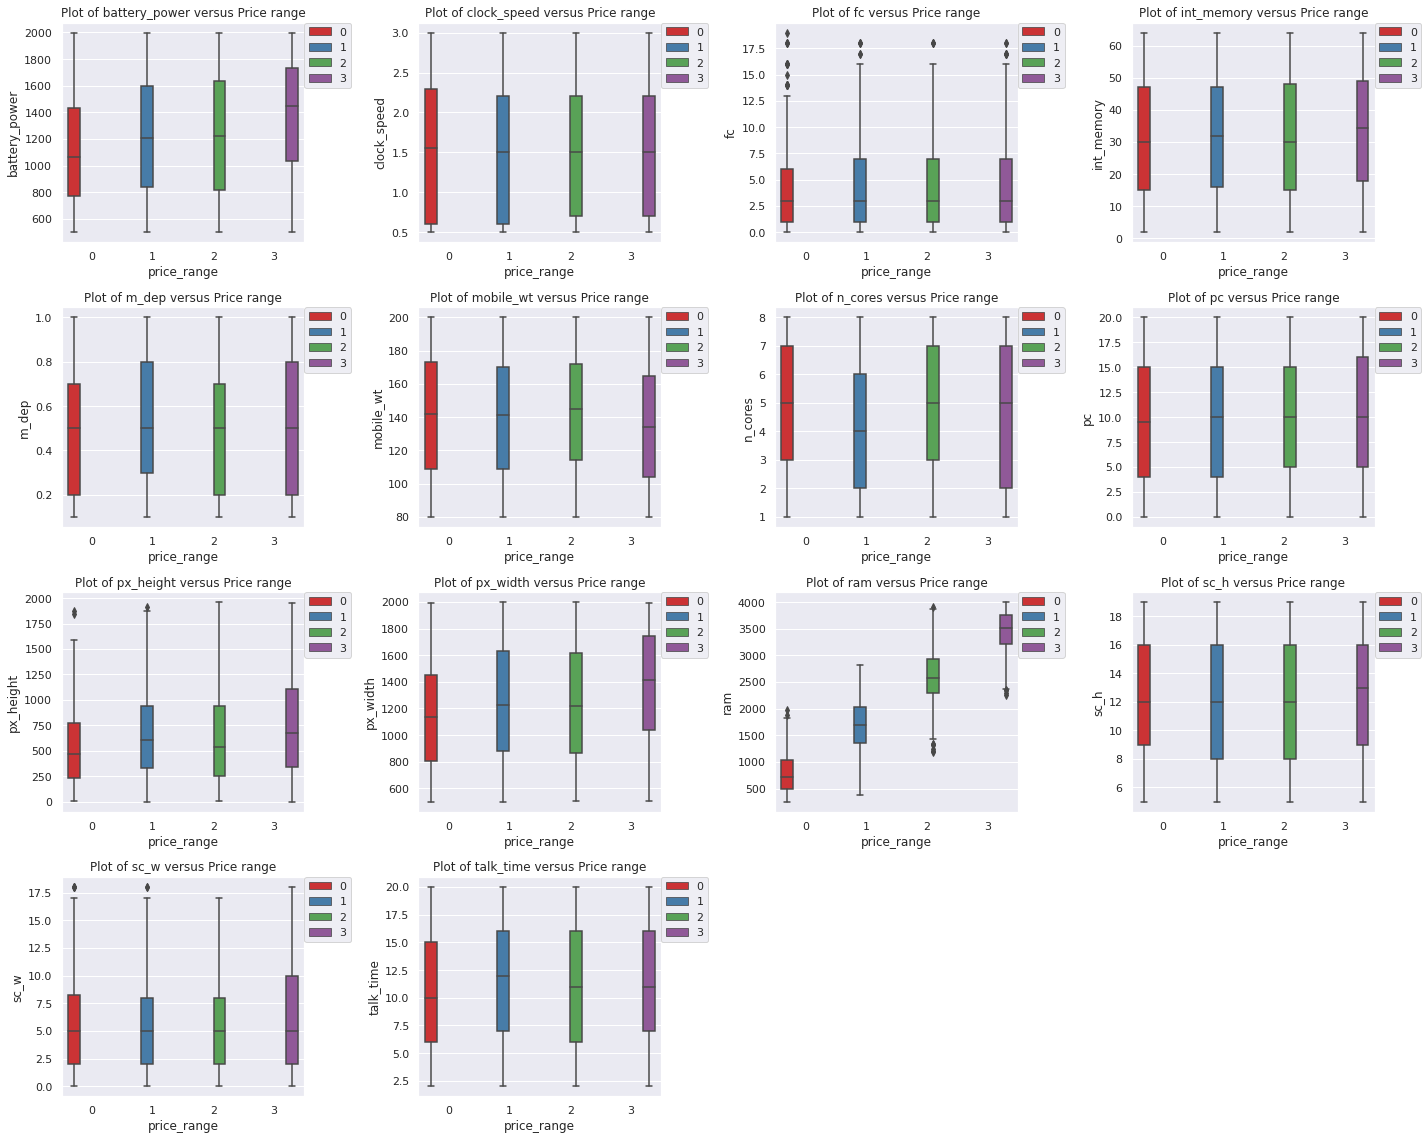

In [ ]:
#Box plot of price range and independent numerical columns
fig = plt.figure(figsize=(20,16))
c=1
for i in numerical_columns :
    plt.subplot(4,4, c)
    sns.boxplot(x='price_range',y=i,data=df,hue='price_range',palette='Set1')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
    plt.title(f'Plot of {i} versus Price range')
    c = c + 1
plt.tight_layout()

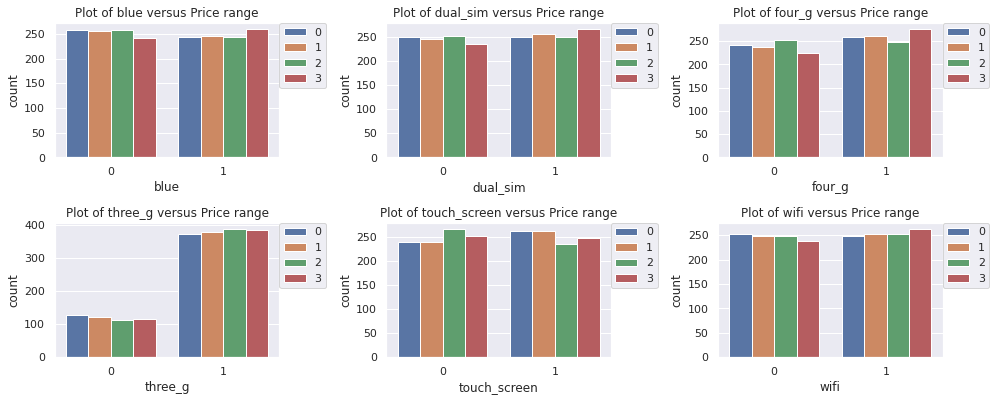

In [ ]:
#count plot of price range vs categorical columns
fig = plt.figure(figsize=(14,8))
c=1
for i in ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'] :
    plt.subplot(3,3, c)
    sns.countplot(x=i,data=df,hue='price_range')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
    plt.title(f'Plot of {i} versus Price range')
    c = c + 1
plt.tight_layout()

## **Multivariate analysis**

Text(0, 0.5, 'Number of phones')

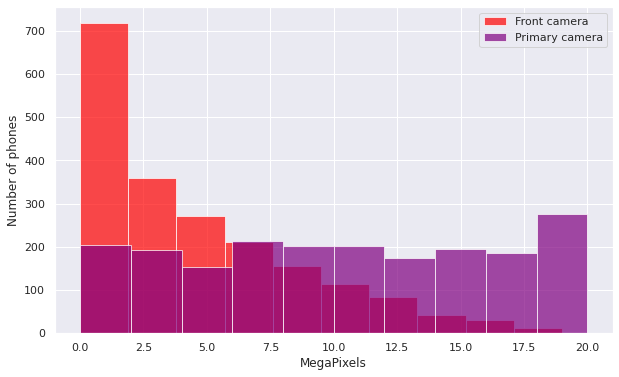

In [ ]:
#Histogram of Number of phones and pixel quality of front camera and primary camera
plt.figure(figsize=(10,6))
df['fc'].hist(alpha=0.7,color='Red',label='Front camera')
df['pc'].hist(alpha=0.7,color='Purple',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')
plt.ylabel('Number of phones')

 Front cameras present in majority of phones have poor quality(below 2.5 MP)
 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f248b832580>,
      dtype=object)

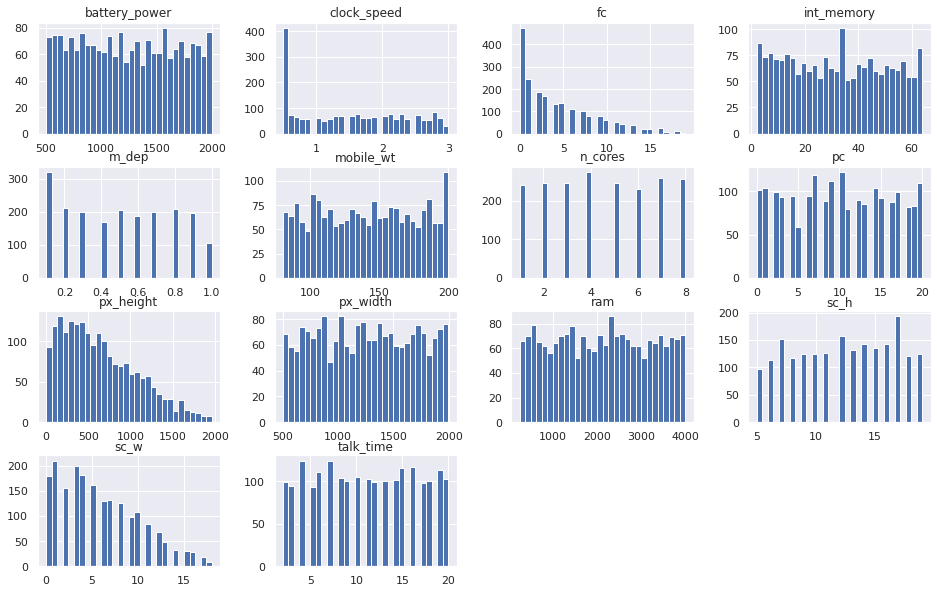

In [ ]:
# plotting all the columns except categorical 
hist_plot=df.drop(["blue","dual_sim","four_g","three_g","touch_screen","wifi","price_range"],axis=1)
hist_plot.hist(figsize=[16,10],bins=30)

### Observing dependence of features on target variable (plotting only ones that show any relation with the target)

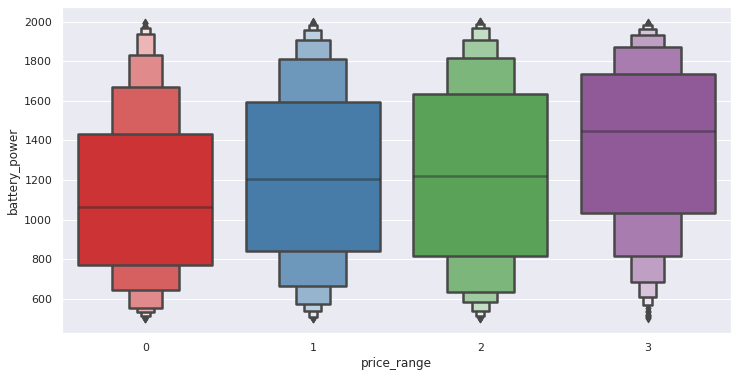

In [ ]:
#plotting price range with battery
plt.figure(figsize=(12,6))
sns.boxenplot(data=df,x="price_range",y="battery_power",palette="Set1",linewidth=2.5)
plt.show()

**Replatively expensive phones have higher capacity batteries**

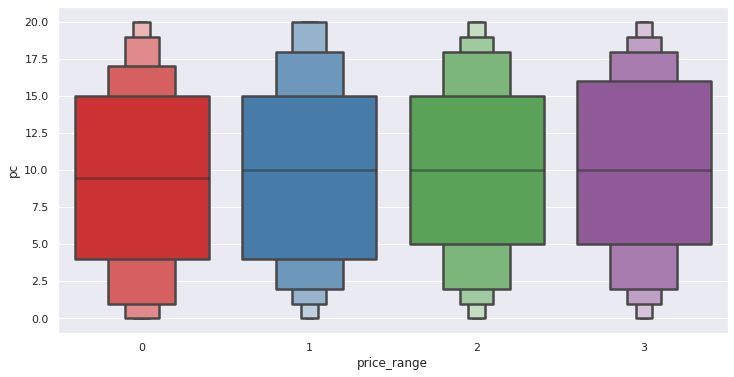

In [ ]:
#plotting price range with primary camera pc
plt.figure(figsize=(12,6))
sns.boxenplot(data=df,x="price_range",y="pc",palette="Set1",linewidth=2.5)
plt.show()

**Most expensive (category 3) phones have better cameras.**

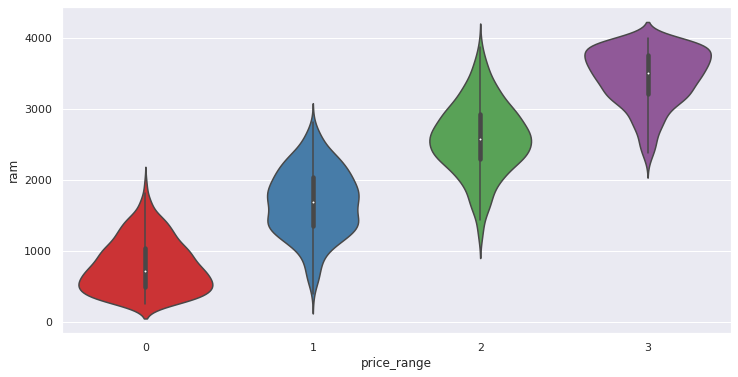

In [ ]:
#plotting price range  with ram
plt.figure(figsize=(12,6))
sns.violinplot(data=df,x="price_range",y="ram",palette="Set1")
plt.show()

**Relatively expensive phones have much bigger rams.**

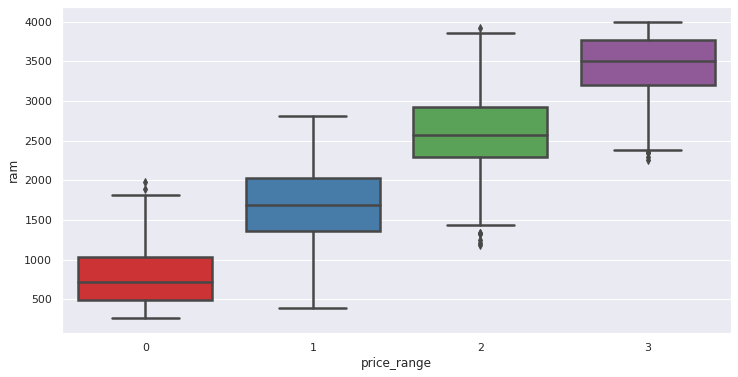

In [ ]:
#plotting price range with pixwl resolution height
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x="price_range",y="ram",palette="Set1",linewidth=2.5)
plt.show()

**Expensive phones have better screen quality.**

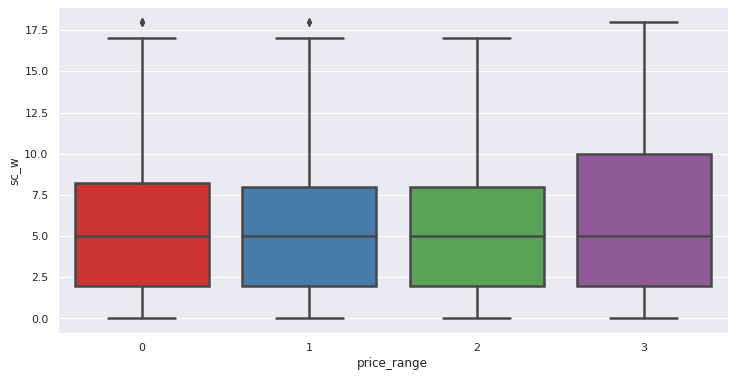

In [ ]:
#plotting price range with screen width
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x="price_range",y="sc_w",palette="Set1",linewidth=2.5)
plt.show()

**Most expensive phones have wider screens.**

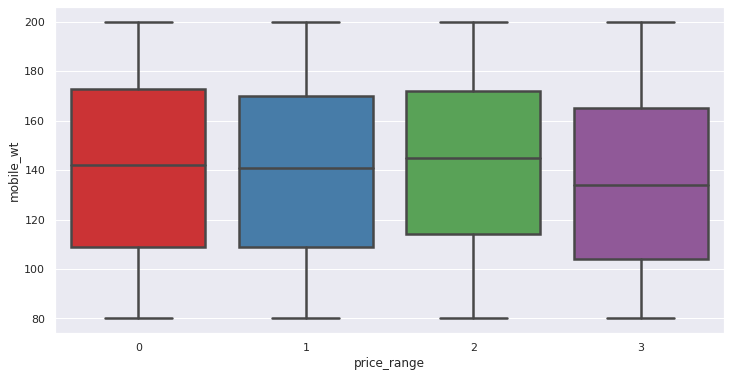

In [ ]:
#plotting price range with mobile weight
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x="price_range",y="mobile_wt",palette="Set1",linewidth=2.5)
plt.show()

**Most exxpensive phones are lighter than the competition**

## **Feature Engineering**
- Checking Multicolinearity

In [ ]:
# So Making a copy of our dataset
df_1=df.copy()

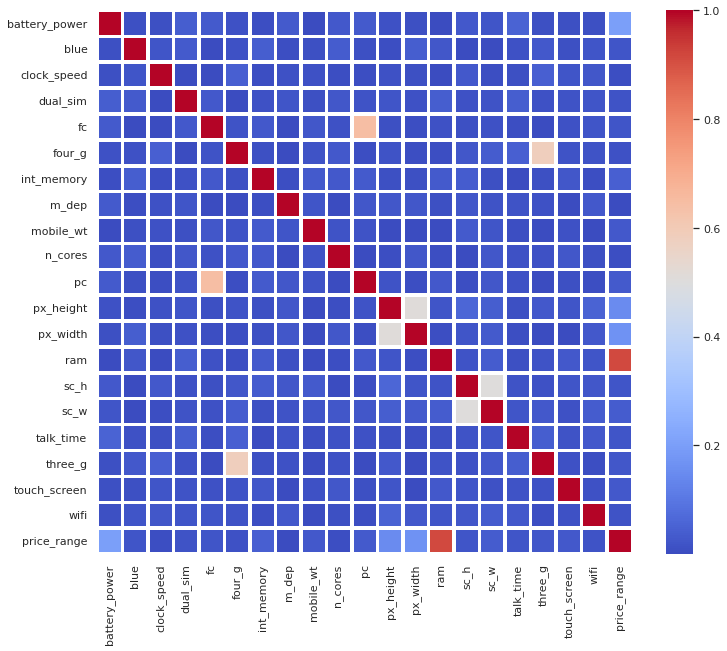

In [ ]:
# heatmap checking for multicollinearity
plt.figure(figsize=(12,10))
sns.heatmap(data=abs(df_1.corr()),annot=False, cmap="coolwarm",linewidth=2.5)
plt.show()

In [ ]:
# Calculating Vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_vif(dataframe):
  # the independent variables set
  x = dataframe
  # VIF dataframe
  vif_data = pd.DataFrame()
  vif_data["feature"] = x.columns
    
  # calculating VIF for each feature
  vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                            for i in range(len(x.columns))]
  print(vif_data)

In [ ]:
check_vif(df_1)

          feature        VIF
0   battery_power   9.852329
1            blue   1.987643
2     clock_speed   4.353409
3        dual_sim   2.038823
4              fc   3.413647
5          four_g   3.194364
6      int_memory   3.979406
7           m_dep   3.952634
8       mobile_wt  14.709826
9         n_cores   4.707757
10             pc   6.251274
11      px_height   4.626185
12       px_width  12.018345
13            ram  39.806450
14           sc_h  11.817054
15           sc_w   3.721933
16      talk_time   4.916936
17        three_g   6.219108
18   touch_screen   2.000108
19           wifi   2.035796
20    price_range  25.874258


In [ ]:
# df_1['screen_resolution'] = df_1['px_height'] * df_1['px_width']

In [ ]:
# df_1['screen_resolution'] 

In [ ]:
# df_1['screen_area'] = df_1['sc_h'] * df_1['sc_w']

In [ ]:
# df_1['screen_area']

In [ ]:
# df_1.drop(['px_height', 'px_width', 'sc_h', 'sc_w'], axis=1, inplace=True)

In [ ]:
check_vif(df_1)

          feature        VIF
0   battery_power   9.852329
1            blue   1.987643
2     clock_speed   4.353409
3        dual_sim   2.038823
4              fc   3.413647
5          four_g   3.194364
6      int_memory   3.979406
7           m_dep   3.952634
8       mobile_wt  14.709826
9         n_cores   4.707757
10             pc   6.251274
11      px_height   4.626185
12       px_width  12.018345
13            ram  39.806450
14           sc_h  11.817054
15           sc_w   3.721933
16      talk_time   4.916936
17        three_g   6.219108
18   touch_screen   2.000108
19           wifi   2.035796
20    price_range  25.874258


**Tried dropping and transforming some features but the VIF score didn't improve. We cannot transform any further as all features are important.**

## **Fixing Some Values**
-As mentioned while exploring data that sc_w and px_h equal to 0 don't make any sense

In [ ]:
# replacing sc_w values equal to zero with it's median.
df_1['sc_w'].replace(0, df_1['sc_w'].median(), inplace=True)

In [ ]:
# replacing px_height values equal to zero with it's median.
df_1['px_height'].replace(0, df_1['px_height'].median(), inplace=True)

## **Spliting Dependent and independent variable**

In [ ]:
#splitting dependent and independent variable
x=df_1.drop(["price_range"],axis=1)
y=df_1["price_range"]

In [ ]:
x.shape

(2000, 20)

In [ ]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [ ]:
#implementing KBest feature selection method
from sklearn.feature_selection import SelectKBest,chi2
best_features = SelectKBest(chi2,k=15)
kbest= best_features.fit(x,y)
scores = pd.DataFrame(kbest.scores_)
features = pd.DataFrame(x.columns)

# concat both dataframes for comparing best scores
score_list = pd.concat([features,scores],axis=1)
score_list.columns = ["features","scores"]
score_list

,features,scores
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [ ]:
#Top 12 Features with highest scores
new=score_list.nlargest(12,"scores")
print(new)

         features         scores
13            ram  931267.519053
11      px_height   17561.692129
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
16      talk_time      13.236400
15           sc_w      10.764356
4              fc      10.135166
14           sc_h       9.614878
10             pc       9.186054
9         n_cores       9.097556


In [ ]:
#Creating a dataframe for the selected independent features
x = df_1[list(new['features'])]
x

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,talk_time,sc_w,fc,sc_h,pc,n_cores
0,2549,20,842,756,188,7,19,7,1,9,2,2
1,2631,905,1021,1988,136,53,7,3,0,17,6,3
2,2603,1263,563,1716,145,41,9,2,2,11,6,5
3,2769,1216,615,1786,131,10,11,8,0,16,9,6
4,1411,1208,1821,1212,141,44,15,2,13,8,14,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,668,1222,794,1890,106,2,19,4,0,13,14,6
1996,2032,915,1965,1965,187,39,16,10,0,11,3,4
1997,3057,868,1911,1632,108,36,5,1,1,9,3,8
1998,869,336,1512,670,145,46,19,10,4,18,5,5


In [ ]:
# Splitting the data in train and test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=141)

In [ ]:
x_train1 = x_train.copy()
feature = list(x.columns)

In [ ]:
x_train1.columns = feature

## **Scaling the data**

In [ ]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(1400, 12)
(600, 12)


## **Model Implementations**

In [ ]:
# models list for dataframe of models
models_list = []

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,recall_score,precision_score,f1_score,roc_auc_score

In [ ]:
def evaluate_model(name,x_test,y_true,y_pred):

  '''
  This function calculate  metrics for evaluating 
  the perfomance of Regression models
  '''
  list_of_scores=[]
  #Accuracy 
  Accuracy =  accuracy_score(y_true,y_pred)
  print(f'Accuracy : {Accuracy}')
    
  #Recall
  Recall  = recall_score(y_true,y_pred,average='weighted')
  print("Recall :" , {Recall})

  #precision
  Precision = precision_score(y_true,y_pred,average='weighted')
  print("Precision :" ,{Precision})
 
  #f1 score
  F1 = f1_score(y_true,y_pred,average='weighted')
  print("F1 :" ,{F1})

  #finding the adjusted r2 score
  # Auc=roc_auc_score(y_true,y_pred,average='weighted',multi_class='ovr')
  # print("Adjusted R2 : ",{Auc})

  list_of_scores.extend([name,Accuracy,Recall,Precision,F1])
  return(list_of_scores)

In [ ]:
def classification_performance(y_,y_pred):
  '''
  prints the confusion matrix,classification report and accuracy score of the model

  '''
  from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
  #accuracy
  print("Accuracy score is {}".format(accuracy_score(y_, y_pred)))

  #confusion matrix and classification report for the test/train set
  print("-"*60)
  print('Classification report')
  print(classification_report(y_, y_pred,digits=3))

  print("Confusion matrix")
  labels = ['Low', 'Medium','High','Premium']
  cm = confusion_matrix(y_, y_pred)
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
  # labels, title and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)
  print("-"*60)

In [ ]:
# implementing baseline model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
print(clf.coef_)
print('-'*50)
print(clf.intercept_)

[[-1.32610224e+01 -2.24833934e+00 -3.43651505e+00 -1.96682134e+00
   4.47951383e-01 -1.82523896e-01 -1.56863788e-01  6.80567906e-03
  -2.75186606e-01 -1.30444094e-01  4.84653740e-02  2.41972968e-01]
 [-3.82515776e+00 -3.35197873e-01 -7.47670571e-01 -6.64964614e-01
   7.50552729e-02  1.94173781e-02  1.12025970e-01 -1.20662153e-01
   2.15945062e-01 -9.68580133e-02 -1.30778590e-01 -4.40711946e-01]
 [ 3.89758489e+00  5.84873916e-01  7.75155492e-01  4.64291653e-01
   2.40090902e-01 -1.86433170e-01  1.57270800e-02  1.45904148e-01
   1.92247837e-01 -9.80809105e-02 -1.52136299e-01  7.62088635e-02]
 [ 1.31885953e+01  1.99866330e+00  3.40903013e+00  2.16749430e+00
  -7.63097558e-01  3.49539688e-01  2.91107377e-02 -3.20476741e-02
  -1.33006293e-01  3.25383018e-01  2.34449514e-01  1.22530114e-01]]
--------------------------------------------------
[  8.77165746   4.10668491  -1.67791237 -11.20042999]


In [ ]:
# Get the predicted classes
train_class_preds = clf.predict(x_train)
test_class_preds = clf.predict(x_test)

##Evaluating the model
models_list.append(evaluate_model('Logistic (Baseline)',x_test,y_test,test_class_preds))

Accuracy : 0.9266666666666666
Recall : {0.9266666666666666}
Precision : {0.9284335723033326}
F1 : {0.9269611731284899}


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.9357142857142857
The accuracy on test data is  0.9266666666666666


[[320  10   0   0]
 [ 14 338  13   0]
 [  0  22 300  25]
 [  0   0   6 352]]


[Text(0, 0.5, 'Low'),
 Text(0, 1.5, 'Medium'),
 Text(0, 2.5, 'High'),
 Text(0, 3.5, 'Premium')]

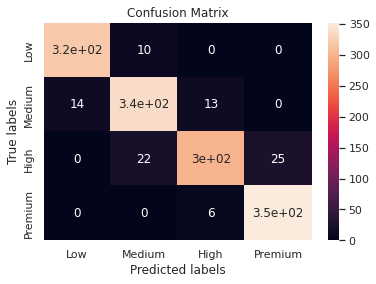

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Low', 'Medium','High','Premium']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
#implementing Repeated Stratified k-fold grid search cross validation 
logistic = LogisticRegression()
scoring = ['accuracy']
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
# define search
search = GridSearchCV(logistic, space, scoring='accuracy', n_jobs=-1, cv=cv)

In [ ]:
# executing search
clf_best = search.fit(x_train, y_train)

In [ ]:
y_pred_testing = clf_best.predict(x_test)

Accuracy score is 0.95
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      0.982     0.953     0.967       170
           1      0.900     0.933     0.916       135
           2      0.929     0.948     0.939       153
           3      0.986     0.965     0.975       142

    accuracy                          0.950       600
   macro avg      0.949     0.950     0.949       600
weighted avg      0.951     0.950     0.950       600

Confusion matrix
------------------------------------------------------------


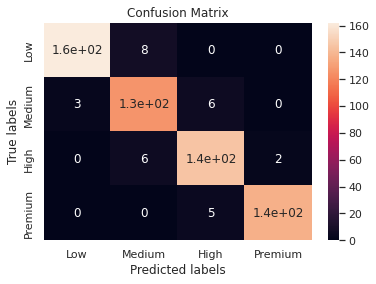

In [ ]:
# Accuracy score,confusion matrix and classification report for test set
classification_performance(y_test,y_pred_testing)

In [ ]:
# Evaluating the model
models_list.append(evaluate_model('Logistic (Tuned)',x_test,y_test,y_pred_testing))

Accuracy : 0.95
Recall : {0.95}
Precision : {0.9509624398383392}
F1 : {0.9503031130308637}


## **Randomforest Classifier**

In [ ]:
#Fitting the RF Classifier with default parameters to the training set  
from sklearn.ensemble import RandomForestClassifier  
rfc= RandomForestClassifier( )  
rfc.fit(x_train, y_train) 

RandomForestClassifier()

Evaluating the performance on Test data
Accuracy score is 1.0
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       330
           1      1.000     1.000     1.000       365
           2      1.000     1.000     1.000       347
           3      1.000     1.000     1.000       358

    accuracy                          1.000      1400
   macro avg      1.000     1.000     1.000      1400
weighted avg      1.000     1.000     1.000      1400

Confusion matrix
------------------------------------------------------------


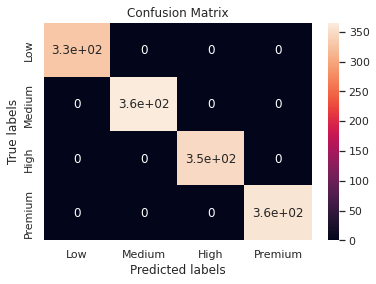

In [ ]:
#Predicting the test set result  
y_pred_train= rfc.predict(x_train)  
# Accuracy score,confusion matrix and classification report for testing set
print('Evaluating the performance on Test data')
classification_performance(y_train,y_pred_train)

Evaluating the performance on Test data
Accuracy score is 0.8916666666666667
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      0.963     0.918     0.940       170
           1      0.803     0.904     0.850       135
           2      0.870     0.830     0.849       153
           3      0.929     0.915     0.922       142

    accuracy                          0.892       600
   macro avg      0.891     0.892     0.890       600
weighted avg      0.895     0.892     0.892       600

Confusion matrix
------------------------------------------------------------


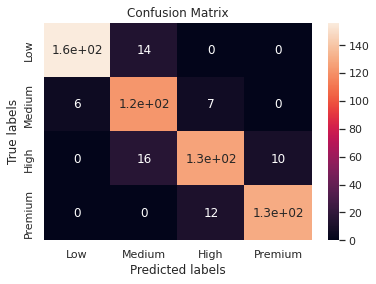

In [ ]:
#Predicting the test set result  
y_pred_test= rfc.predict(x_test)  
# Accuracy score,confusion matrix and classification report for testing set
print('Evaluating the performance on Test data')
classification_performance(y_test,y_pred_test)

In [ ]:
#Evaluating the model
models_list.append(evaluate_model('Random Forest (Baseline)',x_test,y_test,y_pred_test))

Accuracy : 0.8916666666666667
Recall : {0.8916666666666667}
Precision : {0.8950085846910529}
F1 : {0.8923796421185023}


In [ ]:
# making function to plot model's feature importance
def plotting_imp_features(model, training_data):
  imp_features = model.feature_importances_
  feature_names = training_data.columns
  _imp_features = pd.Series(imp_features, index=feature_names)
  df=pd.DataFrame({'Features':feature_names,'Importance':imp_features})
  df=df.sort_values(by='Importance',ascending=False).head(10)
  sns.barplot(x='Importance',y='Features',data=df,palette = 'Set1')

In [ ]:
rfc.feature_importances_

array([0.53642587, 0.06501812, 0.08685242, 0.06288728, 0.04307066,
       0.0377592 , 0.0321319 , 0.02820866, 0.02460054, 0.02851145,
       0.02941323, 0.02512067])

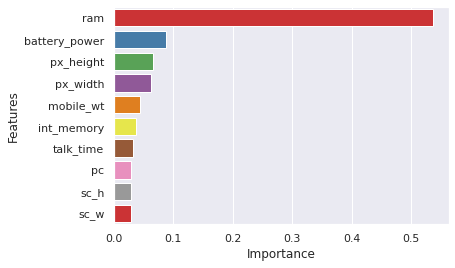

In [ ]:
plotting_imp_features(rfc, x_train1)

## **Rf Hyperparameter Tuning**

In [ ]:
#Performing Grid Search Cross validation to find the best parameters 
rfr=RandomForestClassifier( )  
parameters_grid={'n_estimators' :[100, 300, 500],
                 'max_depth' : [5, 8, 15, 25, 30],
                 'min_samples_split' : [2, 5, 10, 15, 100],
                 'min_samples_leaf': [1, 2, 5, 10]}
rfr_cv = GridSearchCV(rfr, param_grid=parameters_grid, cv = 3, verbose = 1, n_jobs = -1,scoring='accuracy')
rfr_cv.fit(x_train, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 8, 15, 25, 30],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy', verbose=1)

In [ ]:
print(rfr_cv.best_params_)


{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [ ]:
# implementing using best parameters
best_rfr=rfr_cv.best_estimator_
best_rfr.fit(x_train, y_train)  

# prediction for training set
y_pred_train = best_rfr.predict(x_train)
# prediction fot testing set
y_pred_test =best_rfr.predict(x_test)

Evaluating the performance on Train data
Accuracy score is 1.0
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       330
           1      1.000     1.000     1.000       365
           2      1.000     1.000     1.000       347
           3      1.000     1.000     1.000       358

    accuracy                          1.000      1400
   macro avg      1.000     1.000     1.000      1400
weighted avg      1.000     1.000     1.000      1400

Confusion matrix
------------------------------------------------------------


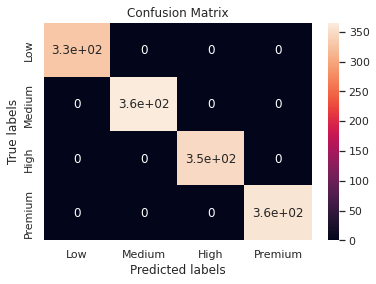

In [ ]:
# Accuracy score,confusion matrix and classification report for training set
print('Evaluating the performance on Train data')
classification_performance(y_train,y_pred_train)

Evaluating the performance on Test data
Accuracy score is 0.8983333333333333
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      0.976     0.941     0.958       170
           1      0.827     0.919     0.870       135
           2      0.863     0.824     0.843       153
           3      0.921     0.908     0.915       142

    accuracy                          0.898       600
   macro avg      0.897     0.898     0.896       600
weighted avg      0.901     0.898     0.899       600

Confusion matrix
------------------------------------------------------------


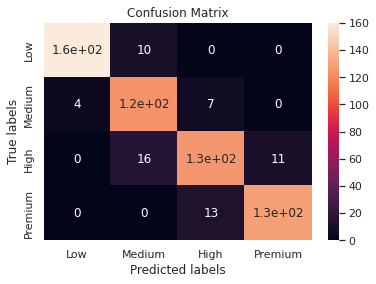

In [ ]:
# Accuracy score,confusion matrix and classification report for testing set
print('Evaluating the performance on Test data')
classification_performance(y_test,y_pred_test)

In [ ]:
#Evaluating the model
models_list.append(evaluate_model('Random Forest (Tuned)',x_test,y_test,y_pred_test))

Accuracy : 0.8983333333333333
Recall : {0.8983333333333333}
Precision : {0.9005626859497559}
F1 : {0.8986877701674556}


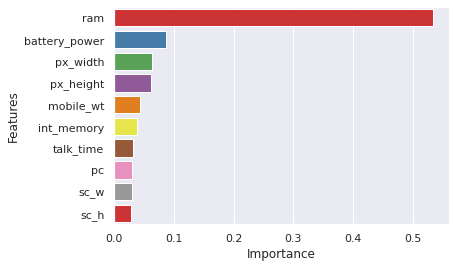

In [ ]:
plotting_imp_features(best_rfr, x_train1)

## **XGBoost**

Evaluating the performance on Train data
Accuracy score is 0.9914285714285714
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      0.997     0.997     0.997       330
           1      0.981     0.989     0.985       365
           2      0.991     0.980     0.986       347
           3      0.997     1.000     0.999       358

    accuracy                          0.991      1400
   macro avg      0.992     0.991     0.992      1400
weighted avg      0.991     0.991     0.991      1400

Confusion matrix
------------------------------------------------------------


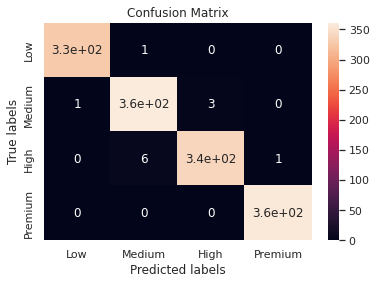

In [ ]:
# Baseline XGB
import xgboost as xgb
xg_cls = xgb.XGBClassifier()
xg_cls.fit(x_train,y_train)

y_pred = xg_cls.predict(x_test)
y_pred_train = xg_cls.predict(x_train)

# Accuracy score,confusion matrix and classification report for training set
print('Evaluating the performance on Train data')
classification_performance(y_train,y_pred_train)

Evaluating the performance on Test data
Accuracy score is 0.895
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      0.963     0.929     0.946       170
           1      0.827     0.919     0.870       135
           2      0.865     0.837     0.850       153
           3      0.920     0.894     0.907       142

    accuracy                          0.895       600
   macro avg      0.894     0.895     0.893       600
weighted avg      0.897     0.895     0.895       600

Confusion matrix
------------------------------------------------------------


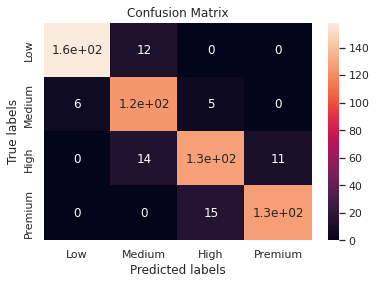

In [ ]:
# Accuracy score,confusion matrix and classification report for testing set
print('Evaluating the performance on Test data')
classification_performance(y_test,y_pred)

In [ ]:
#Evaluating the model
models_list.append(evaluate_model('XGBoost (Baseline)',x_test,y_test,y_pred))

Accuracy : 0.895
Recall : {0.895}
Precision : {0.897309952582487}
F1 : {0.8954208985421358}


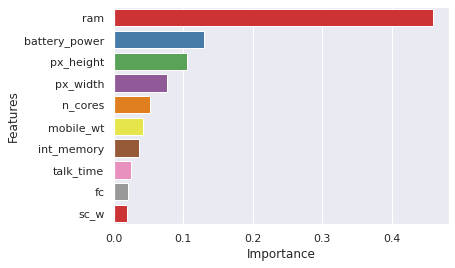

In [ ]:
plotting_imp_features(xg_cls, x_train1)

**XGBOOST Tuning**

In [ ]:
from xgboost.sklearn import XGBClassifier
xgb_2 = XGBClassifier() 
parameters = {#'nthread':[4], #when use hyperthread, xgboost may become slower # supressing this HP,as this makes thing slower
              'objective':['multi:softmax'],
              'learning_rate': [0.01,.03, 0.05, 0.07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [250,500,750,1000]}

xgb_grid = GridSearchCV(xgb_2,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(x_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
0.9071428571428571
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 1000, 'objective': 'multi:softmax', 'silent': 1, 'subsample': 0.7}


Evaluating the performance on Train data
Accuracy score is 1.0
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       330
           1      1.000     1.000     1.000       365
           2      1.000     1.000     1.000       347
           3      1.000     1.000     1.000       358

    accuracy                          1.000      1400
   macro avg      1.000     1.000     1.000      1400
weighted avg      1.000     1.000     1.000      1400

Confusion matrix
------------------------------------------------------------


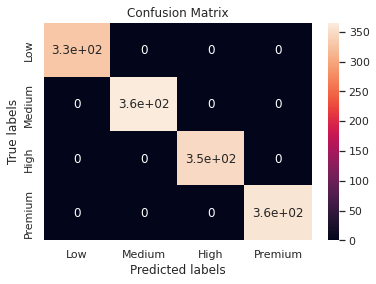

In [ ]:
import xgboost as xgb
#Training data to the model with tuned parameters
xg_clf = xgb.XGBClassifier(colsample_bytree= 0.7, learning_rate= 0.07, max_depth= 5,
                           min_child_weight=4, n_estimators= 750, objective='multi:softmax', silent=1, subsample=0.7)
xg_clf.fit(x_train,y_train)
#Making predictions from XGB model with tuned parameters
y_pred = xg_clf.predict(x_test)
y_pred_train_x = xg_clf.predict(x_train)

# Accuracy score,confusion matrix and classification report for testing set
print('Evaluating the performance on Train data')
classification_performance(y_train,y_pred_train_x)

Evaluating the performance on Test data
Accuracy score is 0.9216666666666666
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      0.964     0.941     0.952       170
           1      0.879     0.919     0.899       135
           2      0.901     0.895     0.898       153
           3      0.936     0.930     0.933       142

    accuracy                          0.922       600
   macro avg      0.920     0.921     0.921       600
weighted avg      0.922     0.922     0.922       600

Confusion matrix
------------------------------------------------------------


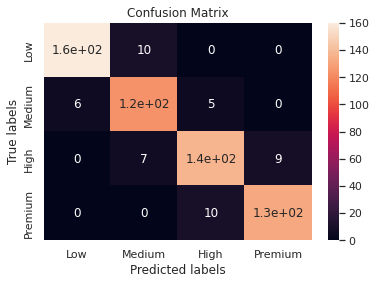

In [ ]:
# Accuracy score,confusion matrix and classification report for testing set
print('Evaluating the performance on Test data')
classification_performance(y_test,y_pred)

In [ ]:
#Evaluating the model
models_list.append(evaluate_model('XGBoost (Tuned)',x_test,y_test,y_pred))

Accuracy : 0.9216666666666666
Recall : {0.9216666666666666}
Precision : {0.9223605199071763}
F1 : {0.9218745352568736}


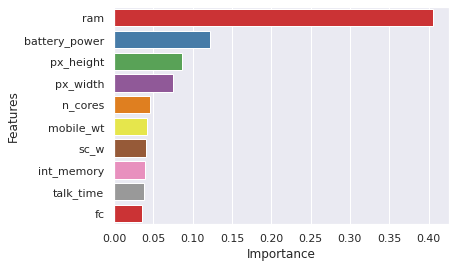

In [ ]:
plotting_imp_features(xg_clf, x_train1)

In [ ]:
#Comparing models
models_stats=pd.DataFrame(models_list,columns=['Classification Model','Accuracy','Recall','Precision','F1-score'])
models_stats  

,Classification Model,Accuracy,Recall,Precision,F1-score
0,Logistic (Baseline),0.926667,0.926667,0.928434,0.926961
1,Logistic (Tuned),0.950000,0.950000,0.950962,0.950303
2,Random Forest (Baseline),0.891667,0.891667,0.895009,0.892380
3,Random Forest (Tuned),0.898333,0.898333,0.900563,0.898688
4,XGBoost (Baseline),0.895000,0.895000,0.897310,0.895421
5,XGBoost (Tuned),0.921667,0.921667,0.922361,0.921875


## **Conclusion**
- After evaluating the performance metrics of model Logistic regression is the best model.
- Logistic Regression scored the accuracy 95% on the test set.
- The most important faeture determining for price range of mobile phone is  :Ram,battery power,pixel_height and pixel width.